# Falied 2D equalization analysis

## 3x3 Lieb square

### 3x3 Lieb no waist UT

3x3 Lieb is a special case, as its t is always equal fixing t might cause a conter effect to equalization.

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.


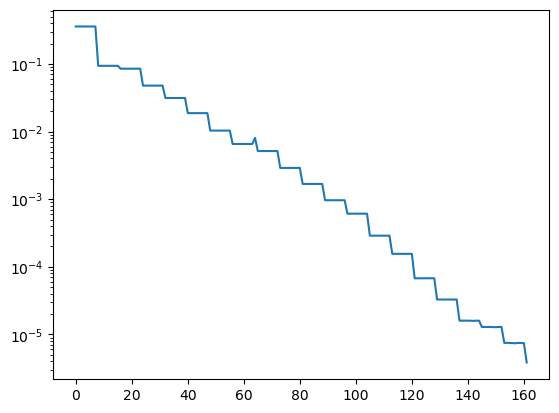

In [2]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1550),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")


plt.plot(c, '-')
plt.yscale('log')


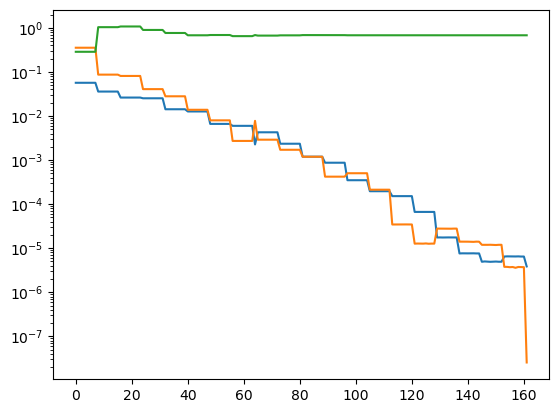

In [3]:
ct = rep.a(report, "Equalization_Log", "cost_func_by_terms")
plt.plot(ct, '-')
plt.yscale('log')


H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.82s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.66s.
H_solver: eigenstates memory usage:  1.19 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.81s.
H_solver: eigenstates memory usage:  1.19 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.73s.
H_solver: eigenstates memory usage:  1.15 MiB.
Single band optimization time: 0.027883052825927734s.
Calcu

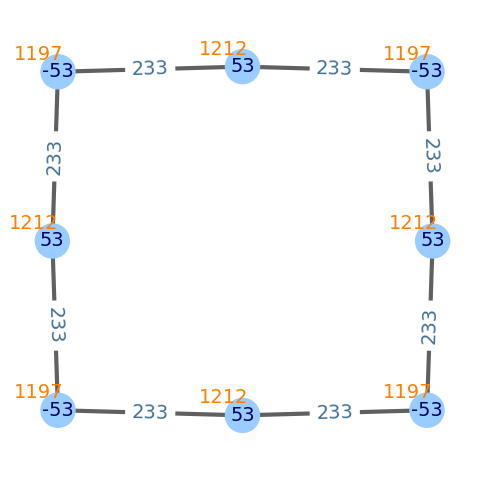

In [5]:
G.draw_graph()


In [4]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=1)
A, U, V = G.singleband_Hubbard(u=True, offset=True)
links = G.xylinks()
def func(x): return 0.8 * np.min(x)
txTarget, tyTarget = G.t_target(G.nn_tunneling(A), links, func)
G.sf = np.min(np.array([txTarget, tyTarget]))
Utarget = np.max(U)
print(txTarget, tyTarget, Utarget)



Equalize: 1-th equalization trap depths: [1.0002683  0.99999561 0.99999561]
Equalize: 1-th equalization trap centers:
[[-1. -1.]
 [-1.  0.]
 [ 0. -1.]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.82s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.76s.
H_solver: eigenstates memory usage:  1.19 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.00s.
H_solver: eigenstates memory usage:  1.19 MiB.


In [6]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=-1)
E, W, p = G.eigen_basis()
G.verbosity = 0
# G.singleband_Hubbard(u=True, offset=True)
E = E[0]
W = W[0]
p = p[0]
R = G.Xmat(W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
solution = riemann_optimize(R)
V = site_order(G, solution, R)
print('detV =', la.det(V))



Equalize: -2-th equalization trap depths: [0.98157676 0.97664542 0.97642409]
Equalize: -2-th equalization trap centers:
[[-1.0272094  -1.02603843]
 [-0.97709336  0.        ]
 [ 0.         -1.01435925]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.80s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.71s.
H_solver: eigenstates memory usage:  1.19 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.80

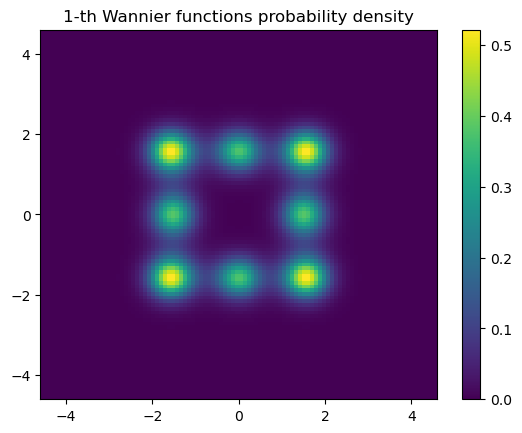

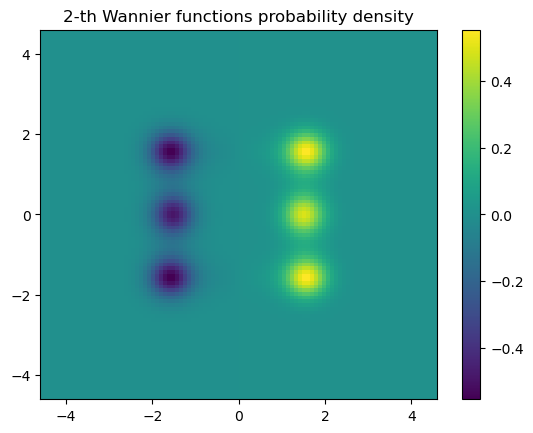

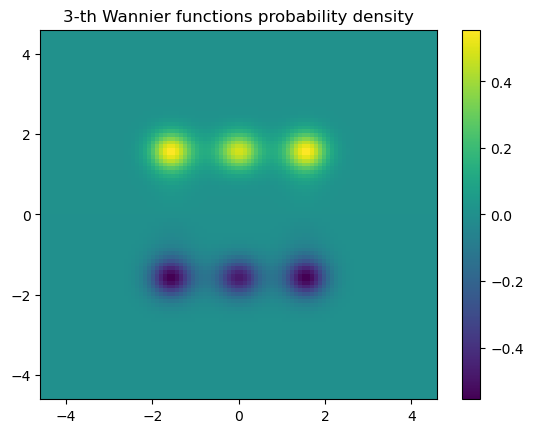

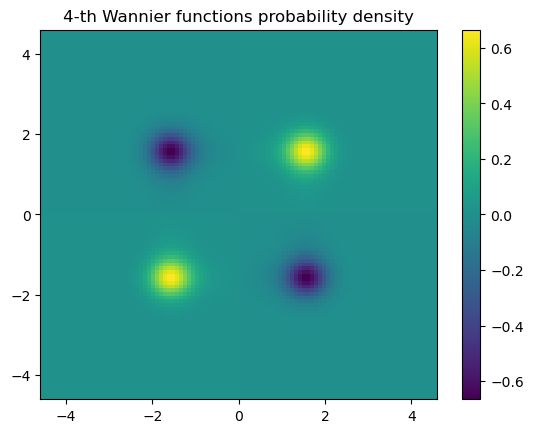

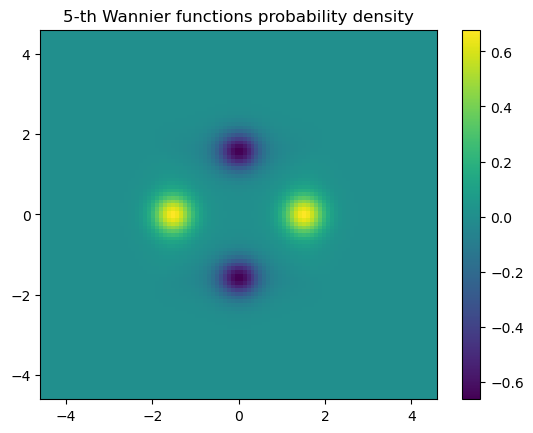

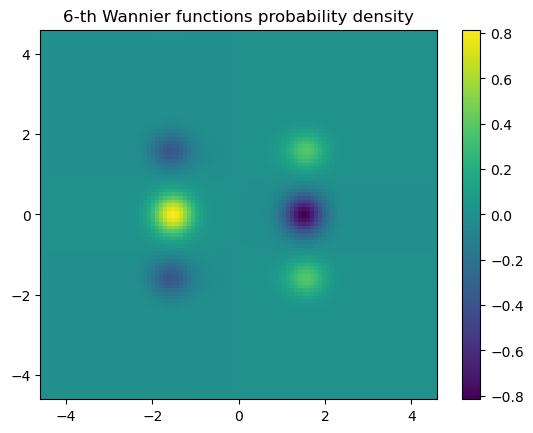

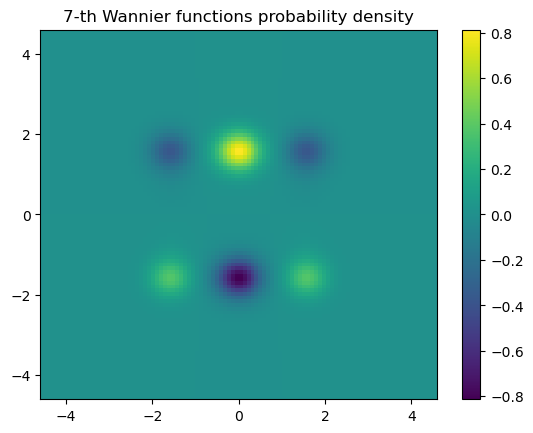

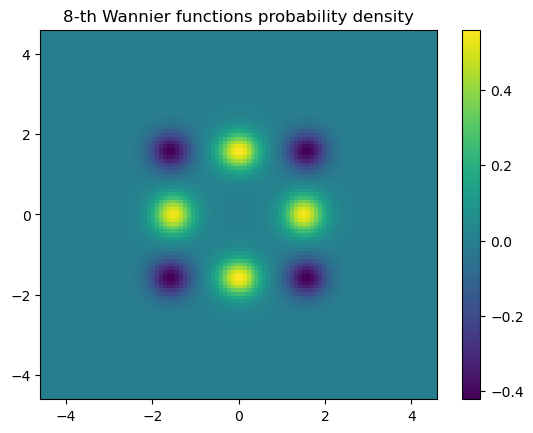

In [7]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-G.R0[0], G.R0[0], 100)
y = np.linspace(-G.R0[1], G.R0[1], 100)
z = np.array([0])
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(
        psi((x, y, z), G.n, G.dx, W[i], p[i])[..., 0, 0], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


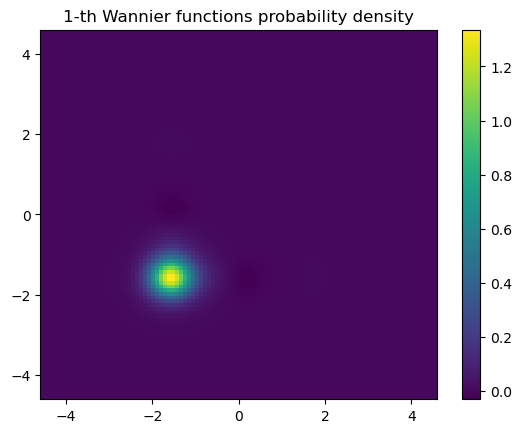

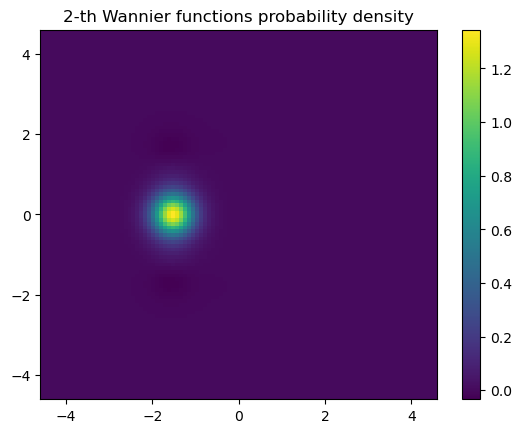

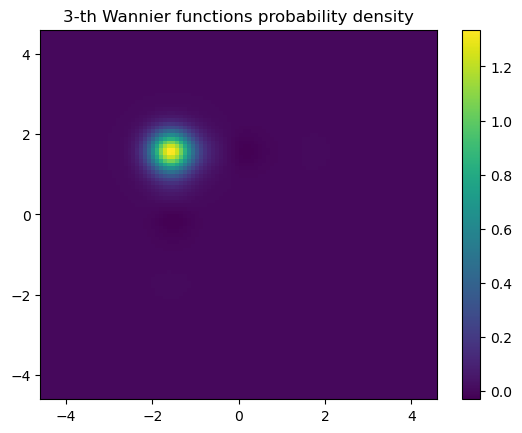

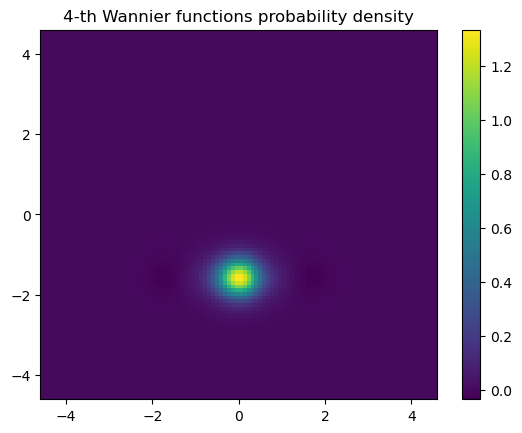

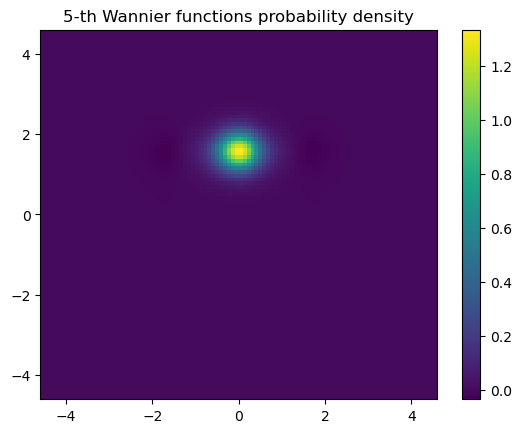

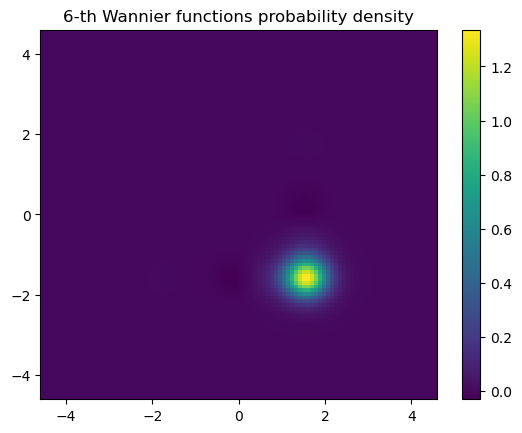

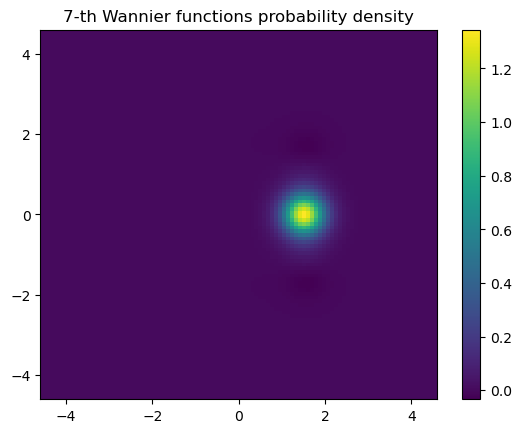

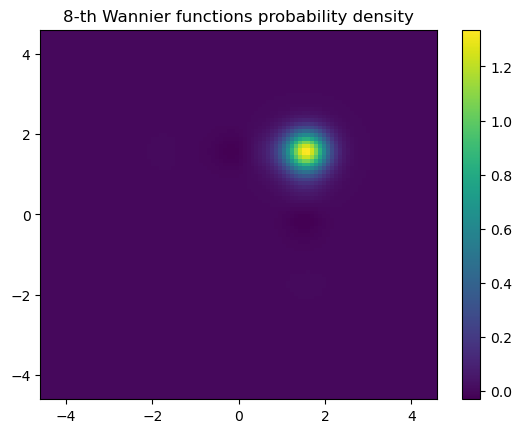

In [8]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-G.R0[0], G.R0[0], 100)
y = np.linspace(-G.R0[1], G.R0[1], 100)
z = np.array([0])
wx = wannier_func((x, y, z), V, G, W, p)
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(wx[..., 0, i], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


### 3x3 Lieb xy UT

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.


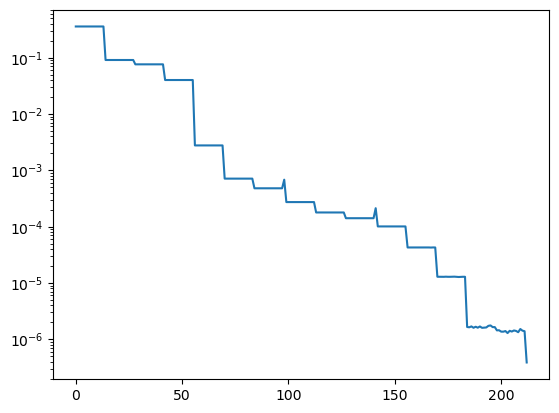

In [16]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = 'xy'
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1550),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")


plt.plot(c, '-')
plt.yscale('log')


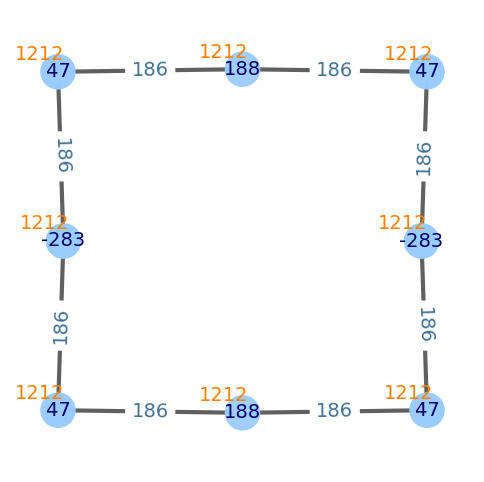

In [25]:
G.draw_graph()

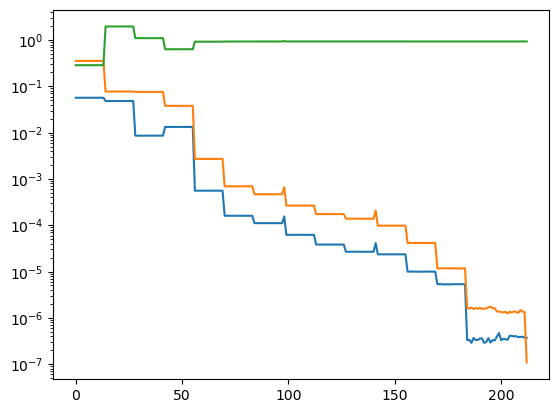

In [18]:
ct = rep.a(report, "Equalization_Log", "cost_func_by_terms")
plt.plot(ct, '-')
plt.yscale('log')


In [23]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=1)
A, U, V = G.singleband_Hubbard(u=True, offset=True)
links = G.xylinks()
def func(x): return 0.8 * np.min(x)
txTarget, tyTarget = G.t_target(G.nn_tunneling(A), links, func)
G.sf = np.min(np.array([txTarget, tyTarget]))
Utarget = np.max(U)
print(txTarget, tyTarget, Utarget)



Equalize: 1-th equalization trap depths: [1.0002683  0.99999561 0.99999561]
Equalize: 1-th equalization waists:
[[1. 1.]
 [1. 1.]
 [1. 1.]]
Equalize: 1-th equalization trap centers:
[[-1. -1.]
 [-1.  0.]
 [ 0. -1.]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.12s.
H_solver: eigenstates memory usage:  1.23 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.99s.
H_solver: eigenstates memory usage:  1.19 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 8 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Ti

In [24]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=0)
G.verbosity = 0
E, W, p = G.eigen_basis()
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, links, (txTarget, tyTarget), G.sf))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')



Equalize: -1-th equalization trap depths: [0.98963971 0.99121403 0.9838604 ]
Equalize: -1-th equalization waists:
[[1.00018718 1.00579486]
 [1.04289335 0.97812136]
 [0.98841198 1.01841118]]
Equalize: -1-th equalization trap centers:
[[-1.02307267 -1.0195717 ]
 [-0.96655441  0.        ]
 [ 0.         -1.01147086]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
V = [ 0.04723558 -0.28276906  0.04723559  0.18829789  0.18829788  0.0472356
 -0.28276905  0.04723556]
t = [0.18601401 0.186014   0.18601429 0.18601429 0.18601429 0.18601399
 0.18601429 0.18601402]
U = [1.21158116 1.211581   1.21158116 1.21158104 1.21158103 1.21158116
 1.211581   1.21158115]
V_err = 0.9306608256156799
t_err = 1.3113255061182327e-06
U_err = 3.724021599335045e-07
fval = 1.3631793542008252e-06
E = [array([-0.68095009, -0.68043334, -0.67520008, -0.67245568, -0.67161862,
       -0.66854485, -0.66477248, -0.66392827])]
parity 

## 3z3 Lieb rectangular

### 3x3 Lieb no waist UT

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.


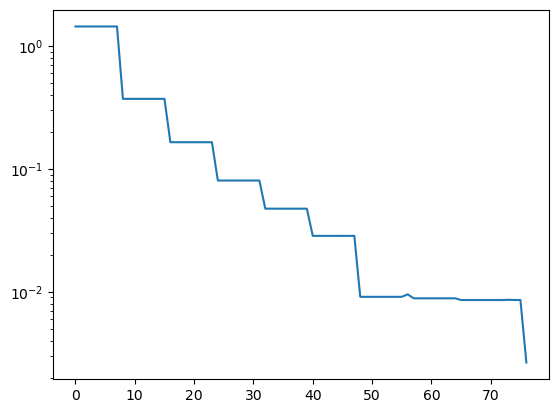

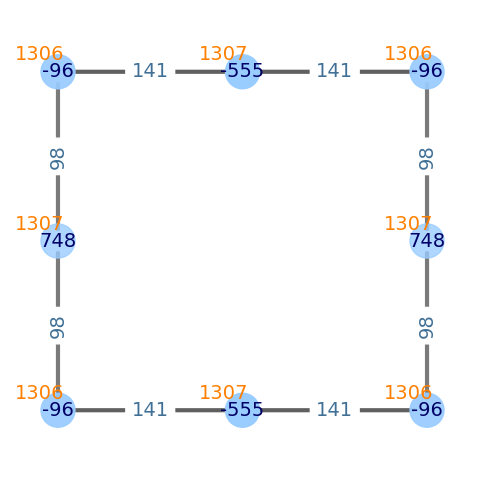

In [1]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}2_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)


A more symmetric lattice is more likely to be equalized.

### 3x3 Lieb no waist UvT

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.


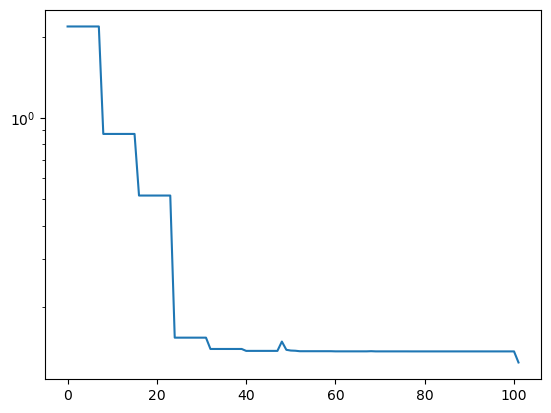

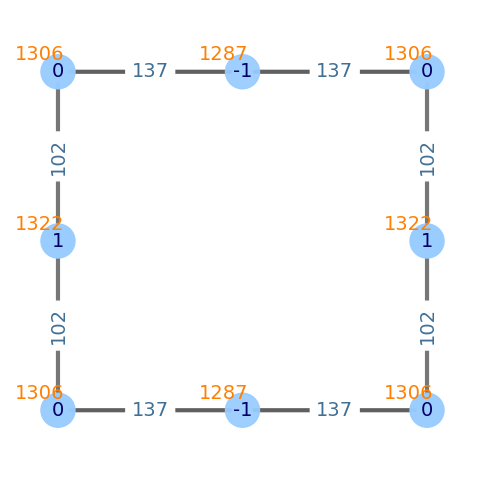

In [2]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}2_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)


### 3x3 Lieb xy UT

Lieb lattice size adjust to: [3 3]
Equalize: scale_factor is not a number. Set to None.


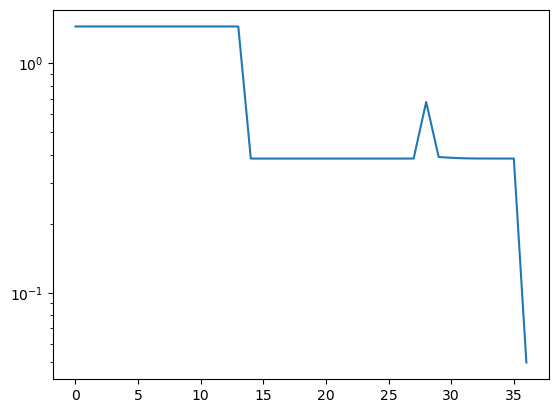

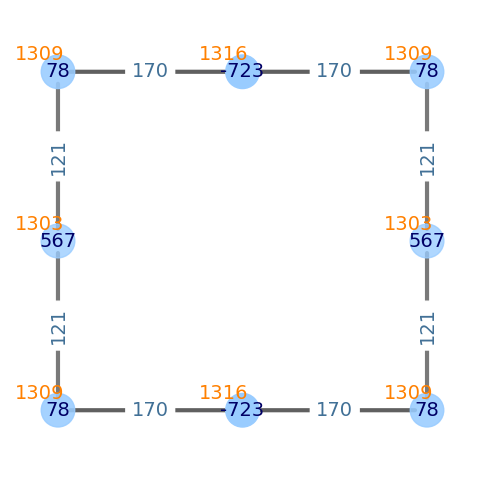

In [3]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = 'xy'
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}2_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)


## 3x3 square

### 3x3 square no waist UT

Equalize: scale_factor is not a number. Set to None.


array([[-1.041229  , -1.04008499],
       [-1.01654687, -0.        ],
       [-1.041229  ,  1.04008499],
       [-0.        , -1.02917335],
       [-0.        , -0.        ],
       [-0.        ,  1.02917335],
       [ 1.041229  , -1.04008499],
       [ 1.01654687, -0.        ],
       [ 1.041229  ,  1.04008499]])

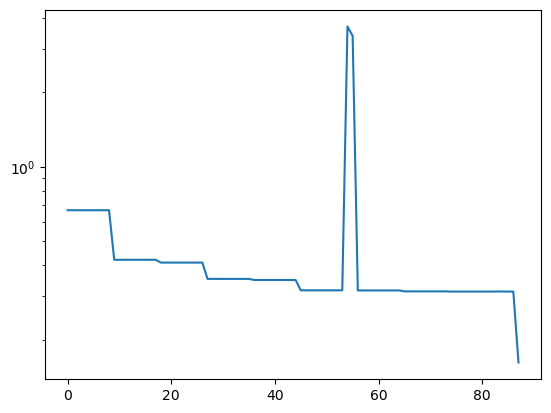

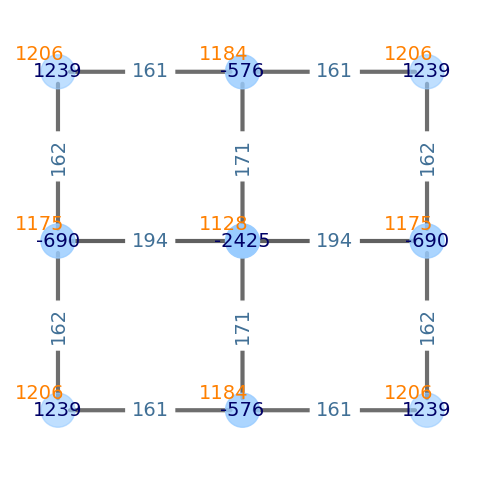

In [3]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1550),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/Convergence analysis/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)
G.trap_centers


In [2]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=1)
A, U, V = G.singleband_Hubbard(u=True, offset=True)
links = G.xylinks()
def func(x): return 0.8 * np.min(x)
txTarget, tyTarget = G.t_target(G.nn_tunneling(A), links, func)
G.sf = np.min(np.array([txTarget, tyTarget]))
Utarget = np.max(U)
print(txTarget, tyTarget, Utarget)



Equalize: 1-th equalization trap depths: [1.03316382 1.01617401 1.01617401 0.9994636 ]
Equalize: 1-th equalization trap centers:
[[-1. -1.]
 [-1.  0.]
 [ 0. -1.]
 [ 0.  0.]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 9 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 2.58s.
H_solver: eigenstates memory usage:  1.39 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 9 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.52s.
H_solver: eigenstates memory usage:  1.34 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 9 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 2.73s.
H_solver: eigenstates mem


Equalize: 55-th equalization trap depths: [0.97099243 1.00553457 1.00190793 1.03185762]
Equalize: 55-th equalization trap centers:
[[-1.04898383 -1.05574543]
 [-1.02116754  0.        ]
 [ 0.         -1.02573322]
 [ 0.          0.        ]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
V = [ 1.42323408 -0.65341237 -2.68329269 -0.58811571  0.84344275  0.44254061
  1.42341295 -0.65362114  0.4458115 ]
t = [0.35054362 0.18823551 0.10467522 0.01876555 0.01568824 0.12359607
 0.01195453 0.10490913 0.01876189 0.34992808 1.04057755 0.00473021]
U = [0.658695   1.12579412 0.81783923 1.16755466 0.50754825 0.43871233
 0.65896457 1.12601293 0.43782943]
V_err = 6.814422598690227
t_err = 2.210431310450821
U_err = 3.002667423862486
fval = 3.7285410332389146
E = [array([-0.73619283, -0.6942218 , -0.69328749, -0.69204678, -0.69121517,
       -0.66098832, -0.65238014, -0.65184303, -0.65174325])]
parity = [array

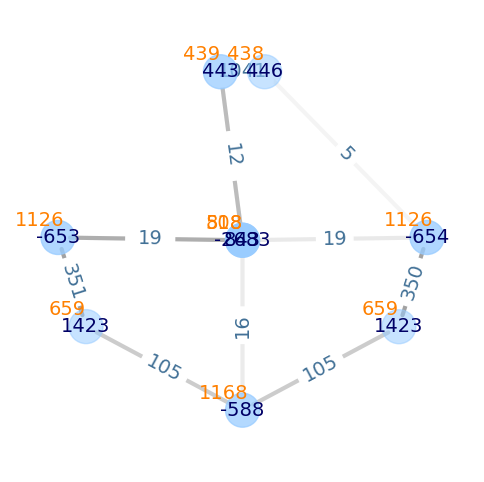

In [3]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=55)
G.verbosity = 0
E, W, p = G.eigen_basis()
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, links, (txTarget, tyTarget), G.sf))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')
G.draw_graph(A=G.A, U=G.U)

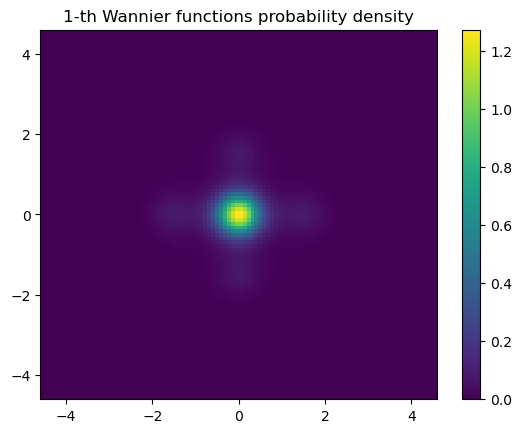

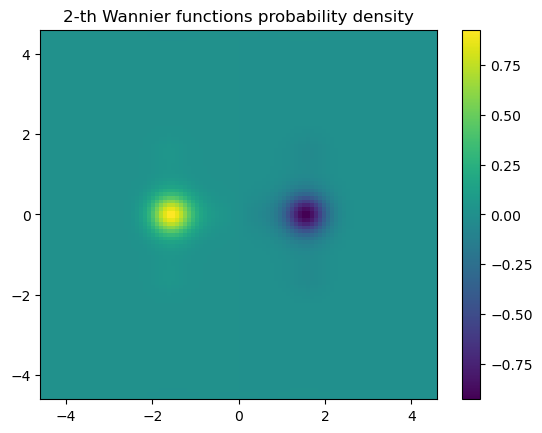

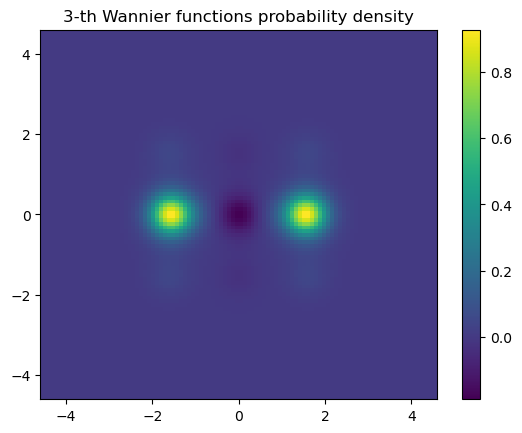

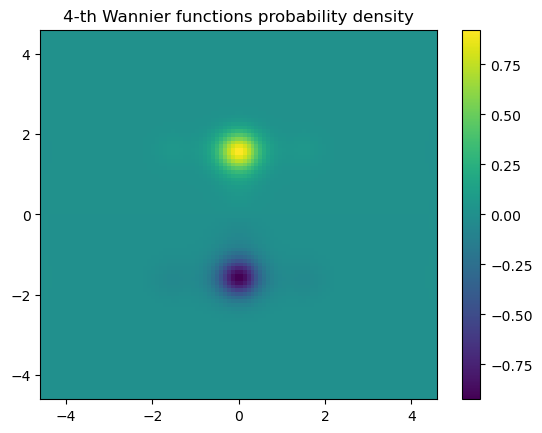

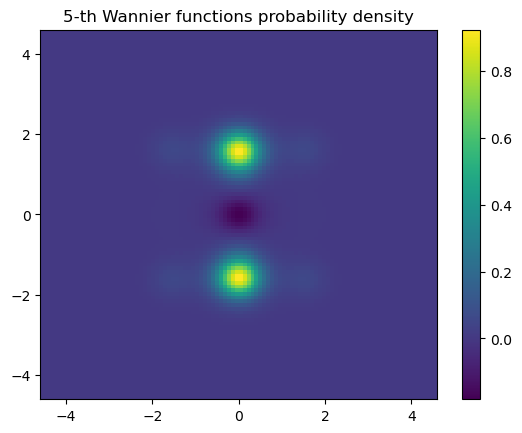

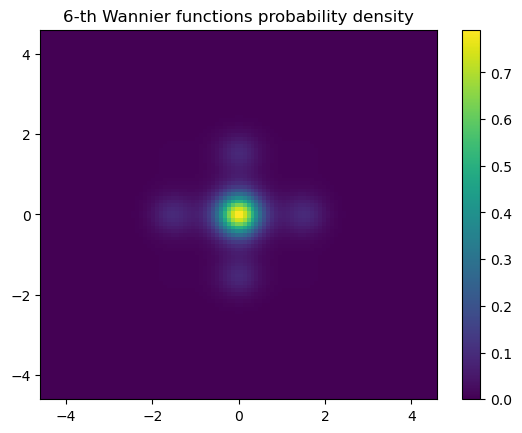

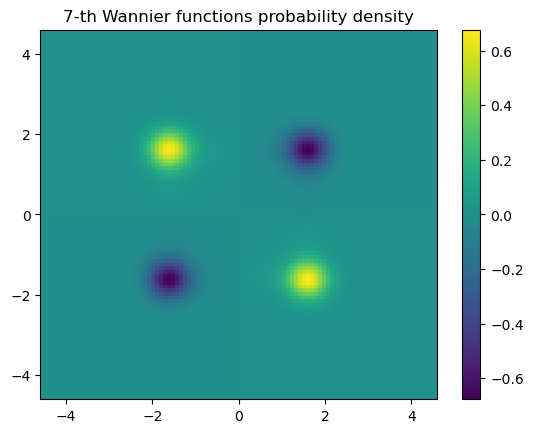

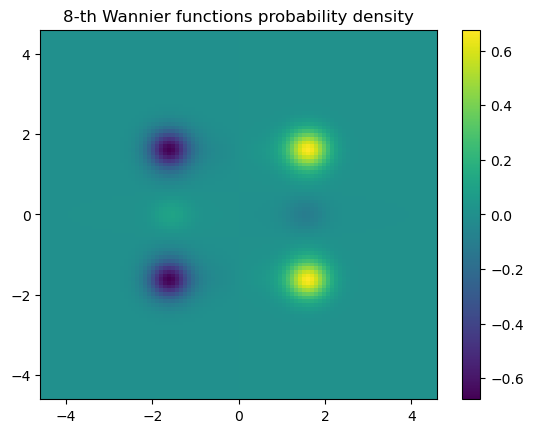

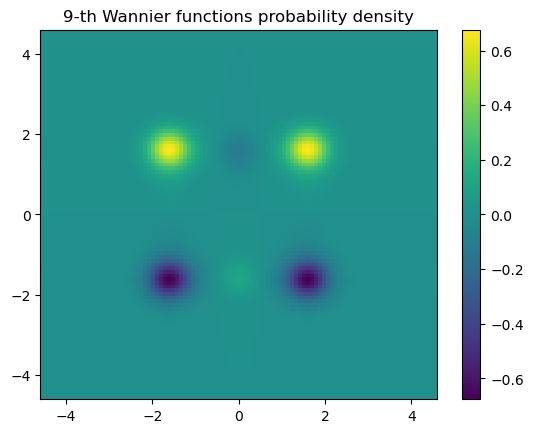

In [34]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-G.R0[0], G.R0[0], 100)
y = np.linspace(-G.R0[1], G.R0[1], 100)
z = np.array([0])
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(
        psi((x, y, z), G.n, G.dx, W[0][i], p[0][i])[..., 0, 0], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


Push spacing larger?

### 3x3 square xy UT

Equalize: scale_factor is not a number. Set to None.


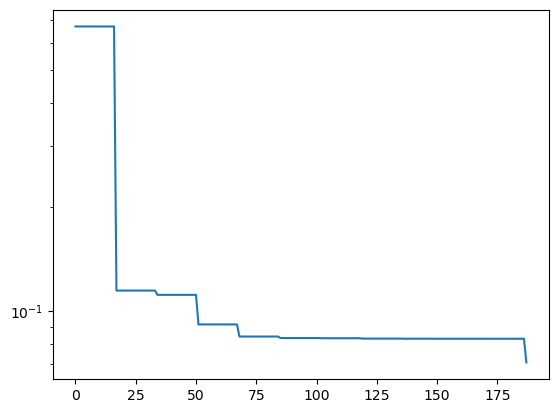

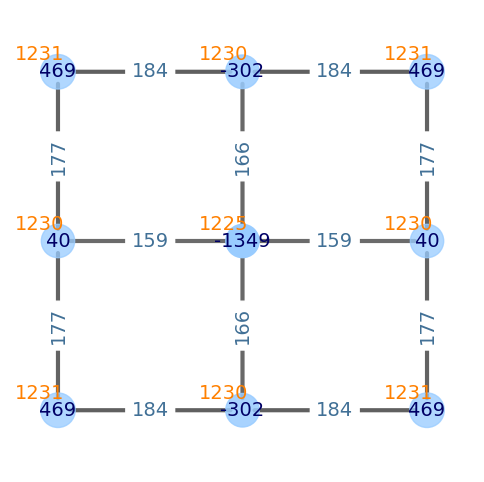

In [14]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = 'xy'
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1550),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/Convergence analysis/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)


The spike is not the reason of not equalization.

### 3x3 square no waist Uv

Equalize: scale_factor is not a number. Set to None.


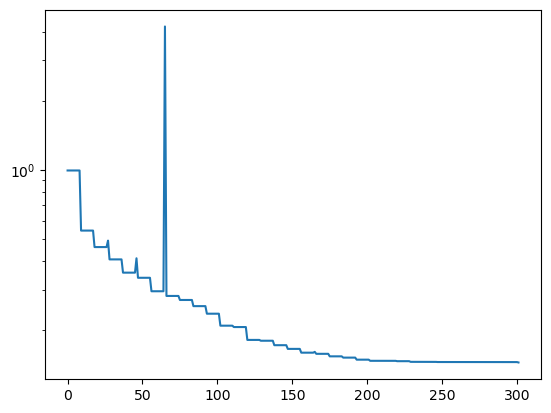

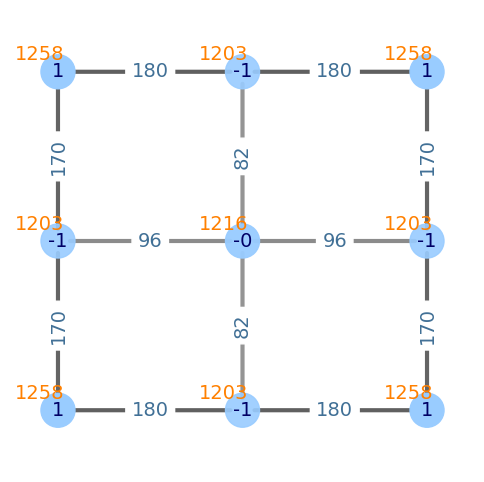

In [ ]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = None
eqt = 'Uv'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1550),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/Convergence analysis/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)


In [ ]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=1)
A, U, V = G.singleband_Hubbard(u=True, offset=True)
links = G.xylinks()
def func(x): return 0.8 * np.min(x)
txTarget, tyTarget = G.t_target(G.nn_tunneling(A), links, func)
G.sf = np.min(np.array([txTarget, tyTarget]))
Utarget = np.max(U)
print(txTarget, tyTarget, Utarget)



Equalize: 1-th equalization trap depths: [1.03316382 1.01617401 1.01617401 0.9994636 ]
Equalize: 1-th equalization trap centers:
[[-1. -1.]
 [-1.  0.]
 [ 0. -1.]
 [ 0.  0.]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 9 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 3.32s.
H_solver: eigenstates memory usage:  1.39 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization starts. Lowest 9 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.61s.
H_solver: eigenstates memory usage:  1.34 MiB.
H_op: n=[30 30 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 9 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.85s.
H_solver: eigenstates mem


Equalize: 66-th equalization trap depths: [1.03272936 1.01996132 1.01922891 1.0156661 ]
Equalize: 66-th equalization trap centers:
[[-1.01806691 -1.02140033]
 [-1.05356815  0.        ]
 [ 0.         -1.05845663]
 [ 0.          0.        ]]
lattice: Full lattice sizes updated to: [3 3 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.55 7.2 ]w is set.
V = [ 0.01746913 -0.01632041  0.01746913 -0.00361898 -0.02999775 -0.00361897
  0.01746914 -0.01632042  0.01746913]
t = [0.17698419 0.17698419 0.18346598 0.13097458 0.12444147 0.18346598
 0.12444147 0.18346598 0.13097458 0.17698419 0.18346598 0.17698419]
U = [1.26634609 1.19198666 1.26634609 1.18990742 1.1538009  1.18990742
 1.26634609 1.19198666 1.26634609]
V_err = 0.09579826879253
t_err = 0.2389307906220482
U_err = 0.2440634673512038
fval = 0.3415477987087154
E = [array([-0.71797696, -0.7143474 , -0.71431335, -0.70973744, -0.70940977,
       -0.70939991, -0.7047052 , -0.70440327, -0.70102835])]
parity = [arra

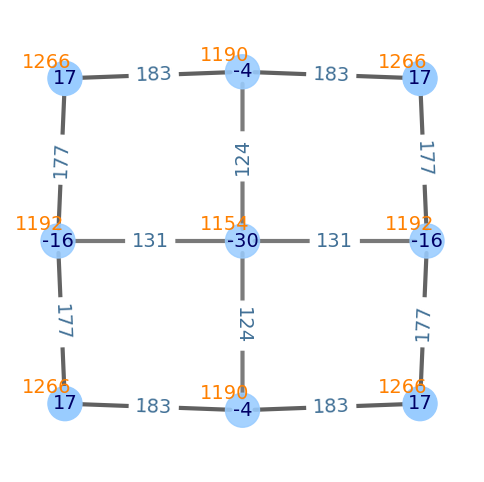

In [ ]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=66)
G.verbosity = 0
E, W, p = G.eigen_basis()
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, links, (txTarget, tyTarget), G.sf))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')
G.draw_graph(A=G.A, U=G.U)

The issue is due to Riemann manifold optimization. Random initial parameters might cause the optimization to fail.

### 3x3 square no waist UvT

Set a larger spacing to get initial parameters.

Equalize: scale_factor is not a number. Set to None.


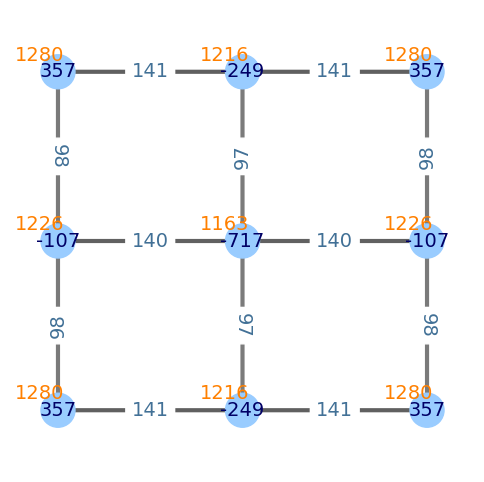

In [1]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = None
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
G.trap_centers *= 1.05
G.draw_graph()

Equalize: scale_factor is not a number. Set to None.


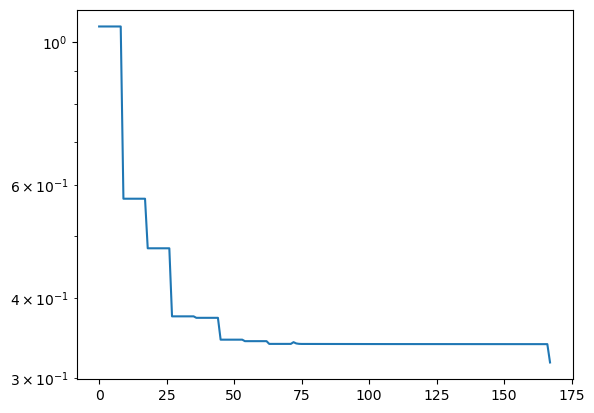

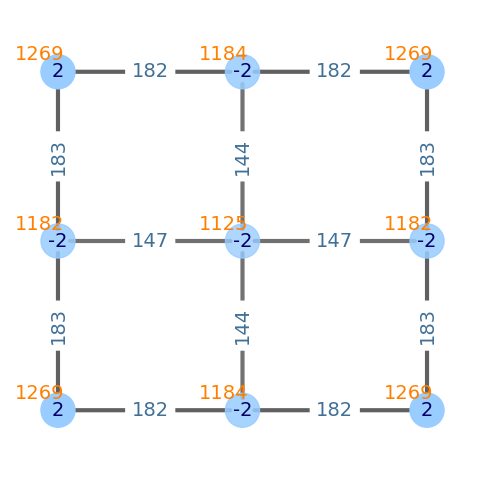

In [2]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = None
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1550),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/Convergence analysis/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)


### 3x3 square xy UvT

Equalize: scale_factor is not a number. Set to None.


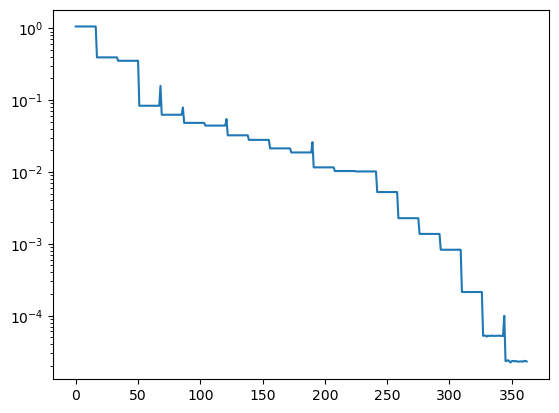

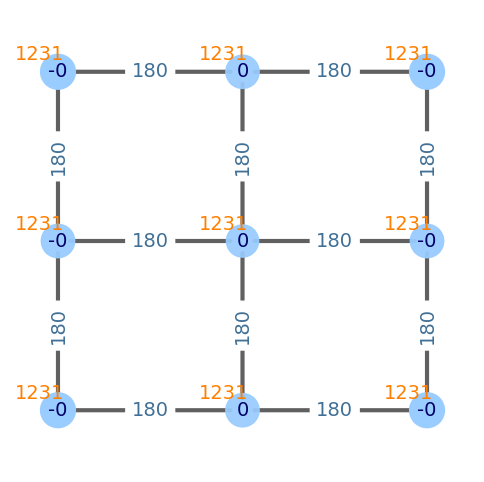

In [9]:
import matplotlib.pyplot as plt
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = 'xy'
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")
G.Voff, G.trap_centers, G.waists,  G.sf = read_trap(report)

plt.plot(c, '-')
plt.yscale('log')
G.draw_graph(A=G.A, U=G.U)
